In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re

%matplotlib inline

In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_excel('book1.xlsx')

In [4]:
df.head()

,User ID,User Name,BGBU,Question,Question Text,Answer
0,1,A,BG2-BU4,9,What did you like the most about Performance A...,IRM and HR discussion
1,2,B,BG6-BU8,9,What did you like the most about Performance A...,NaN
2,3,C,BG1-BU15,9,What did you like the most about Performance A...,HRPP provide the all information about apprais...
3,4,D,BG4-BU9,9,What did you like the most about Performance A...,HR Discussion.
4,5,E,BG6-BU2,9,What did you like the most about Performance A...,transparent process


In [5]:
df.shape

(3544, 6)

In [6]:
# check the missing values 

total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
data_type = df.dtypes
missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
missing_data.head()

,Total,Percent,Data_Type
Answer,736,20.77,object
User Name,4,0.11,object
Question Text,0,0.00,object
Question,0,0.00,int64
BGBU,0,0.00,object


In [7]:
df.columns

Index(['User ID', 'User Name', 'BGBU', 'Question', 'Question Text', 'Answer'], dtype='object')

In [8]:
df[df["Answer"].isnull()]

,User ID,User Name,BGBU,Question,Question Text,Answer
1,2,B,BG6-BU8,9,What did you like the most about Performance A...,NaN
20,21,U,BG1-BU3,9,What did you like the most about Performance A...,NaN
32,33,AG,BG2-BU20,9,What did you like the most about Performance A...,NaN
37,38,AL,BG2-BU20,9,What did you like the most about Performance A...,NaN
47,48,AV,BG2-BU20,9,What did you like the most about Performance A...,NaN
...,...,...,...,...,...,...
3533,876,AGR,BG5-BU12,12,"Any Remarks or Comments, please feel free to s...",NaN
3534,877,AGS,BG5-BU12,12,"Any Remarks or Comments, please feel free to s...",NaN
3539,882,AGX,BG5-BU12,12,"Any Remarks or Comments, please feel free to s...",NaN
3540,883,AGY,BG5-BU12,12,"Any Remarks or Comments, please feel free to s...",NaN


In [9]:
# drop the missing record
df = df.dropna()

In [10]:
df.shape

(2804, 6)

In [11]:
df.head()

,User ID,User Name,BGBU,Question,Question Text,Answer
0,1,A,BG2-BU4,9,What did you like the most about Performance A...,IRM and HR discussion
2,3,C,BG1-BU15,9,What did you like the most about Performance A...,HRPP provide the all information about apprais...
3,4,D,BG4-BU9,9,What did you like the most about Performance A...,HR Discussion.
4,5,E,BG6-BU2,9,What did you like the most about Performance A...,transparent process
5,6,F,BG5-BU5,9,What did you like the most about Performance A...,Whole process is very simple and informative.


In [12]:

total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
data_type = df.dtypes
missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
missing_data.head()

,Total,Percent,Data_Type
Answer,0,0.0,object
Question Text,0,0.0,object
Question,0,0.0,int64
BGBU,0,0.0,object
User Name,0,0.0,object


In [13]:
# check duplicates 

df.duplicated().value_counts()

False    2804
dtype: int64

In [14]:
from textblob import TextBlob 
import pandas as pd
import time
import re 


In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Devdatta
[nltk_data]     Supnekar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [17]:
def clean_text(text): 
    ''' 
    Utility function to clean text text by removing links, special characters 
    using simple regex statements. 
    '''
    return  re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text).lower())


In [18]:
def get_sentiment(score): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    
    if score > 0: 
        return 'positive'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [19]:
for i in df.Answer[:10]:
    print(i)

IRM and HR discussion
HRPP provide the all information about appraisal process .
HR Discussion.
transparent process
Whole process is very simple and informative.
Systematic process
Discussion with Manger and HR. And also the self rating process.
Got to know what are improvement areas for me
Innovative approach at this pandemic situation
Thanks


In [20]:
# clean tweet 
df["Clean_Answer"] = df["Answer"].apply(lambda text: clean_text(text))

In [21]:
df.head()

,User ID,User Name,BGBU,Question,Question Text,Answer,Clean_Answer
0,1,A,BG2-BU4,9,What did you like the most about Performance A...,IRM and HR discussion,irm and hr discussion
2,3,C,BG1-BU15,9,What did you like the most about Performance A...,HRPP provide the all information about apprais...,hrpp provide the all information about apprais...
3,4,D,BG4-BU9,9,What did you like the most about Performance A...,HR Discussion.,hr discussion
4,5,E,BG6-BU2,9,What did you like the most about Performance A...,transparent process,transparent process
5,6,F,BG5-BU5,9,What did you like the most about Performance A...,Whole process is very simple and informative.,whole process is very simple and informative


In [26]:
df["score"] = df["Clean_Answer"].apply(lambda review:sid.polarity_scores(review))

df["compound"] = df["score"].apply(lambda d:d["compound"])
df["sentiment"] = df["compound"].apply(lambda  score : get_sentiment(score))
df
del df["score"]
del df["compound"]


In [27]:
df.head()

,User ID,User Name,BGBU,Question,Question Text,Answer,Clean_Answer,sentiment
0,1,A,BG2-BU4,9,What did you like the most about Performance A...,IRM and HR discussion,irm and hr discussion,neutral
2,3,C,BG1-BU15,9,What did you like the most about Performance A...,HRPP provide the all information about apprais...,hrpp provide the all information about apprais...,neutral
3,4,D,BG4-BU9,9,What did you like the most about Performance A...,HR Discussion.,hr discussion,neutral
4,5,E,BG6-BU2,9,What did you like the most about Performance A...,transparent process,transparent process,neutral
5,6,F,BG5-BU5,9,What did you like the most about Performance A...,Whole process is very simple and informative.,whole process is very simple and informative,neutral


In [28]:
df["sentiment"].value_counts()

positive    1301
neutral     1087
negative     416
Name: sentiment, dtype: int64


Positive percentage: 46.4 %
Negative percentage: 14.84 %
Neutral percentage: 38.77 %


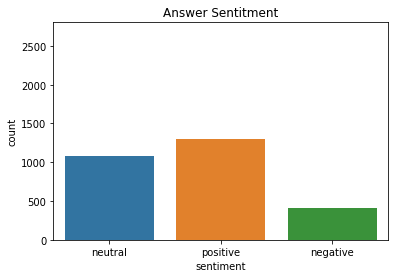

In [31]:
ax = sns.countplot(x="sentiment", data=df)
plt.ylim(0, df.shape[0])
plt.title("Answer Sentitment")
print()

pos = round(df["sentiment"].value_counts()[0]/len(df) * 100, 2)
neu = round(df["sentiment"].value_counts()[1]/len(df) * 100, 2)
neg = round(df["sentiment"].value_counts()[2]/len(df) * 100, 2)

print('Positive percentage: {} %'.format(pos))
print('Negative percentage: {} %'.format(neg))
print('Neutral percentage: {} %'.format(neu))

In [32]:
df_pos = df[df["sentiment"] == "positive"]
df_neg = df[df["sentiment"] == "negative"]
df_ntrl = df[df["sentiment"] == "neutral"]

In [33]:
df_pos.shape

(1301, 8)

In [34]:
df_neg.shape

(416, 8)

In [35]:
df_ntrl.shape

(1087, 8)

In [36]:
import nltk
from nltk.corpus import stopwords

In [37]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [41]:
def remove_stop_word(text):
    stop_words = set(stopwords.words('english')) 
  
    word_tokens = word_tokenize(text) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    return " ".join(filtered_sentence)

In [39]:
df_pos.head()

,User ID,User Name,BGBU,Question,Question Text,Answer,Clean_Answer,sentiment
8,9,I,BG5-BU8,9,What did you like the most about Performance A...,Got to know what are improvement areas for me,got to know what are improvement areas for me,positive
9,10,J,BG2-BU20,9,What did you like the most about Performance A...,Innovative approach at this pandemic situation,innovative approach at this pandemic situation,positive
10,11,K,BG2-BU20,9,What did you like the most about Performance A...,Thanks,thanks,positive
14,15,O,BG4-BU4,9,What did you like the most about Performance A...,Supportive,supportive,positive
15,16,P,BG5-BU9,9,What did you like the most about Performance A...,"Easy workflow , I was able to view the goals a...",easy workflow i was able to view the goals a...,positive


In [44]:
# stop word removal for each dataframe

df_pos["No_stopword"] = df_pos["Clean_Answer"].apply(lambda text: remove_stop_word(text))

df_neg["No_stopword"] = df_neg["Clean_Answer"].apply(lambda text: remove_stop_word(text))

df_ntrl["No_stopword"] = df_ntrl["Clean_Answer"].apply(lambda text: remove_stop_word(text))


In [45]:
df_pos.head()

,User ID,User Name,BGBU,Question,Question Text,Answer,Clean_Answer,sentiment,No_stopword
8,9,I,BG5-BU8,9,What did you like the most about Performance A...,Got to know what are improvement areas for me,got to know what are improvement areas for me,positive,got know improvement areas
9,10,J,BG2-BU20,9,What did you like the most about Performance A...,Innovative approach at this pandemic situation,innovative approach at this pandemic situation,positive,innovative approach pandemic situation
10,11,K,BG2-BU20,9,What did you like the most about Performance A...,Thanks,thanks,positive,thanks
14,15,O,BG4-BU4,9,What did you like the most about Performance A...,Supportive,supportive,positive,supportive
15,16,P,BG5-BU9,9,What did you like the most about Performance A...,"Easy workflow , I was able to view the goals a...",easy workflow i was able to view the goals a...,positive,easy workflow able view goals provide rating e...


In [46]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [54]:

   
ps = PorterStemmer()
   
sentence = "hy my name is dev"

def steaming(text):
    words = word_tokenize(text)
    
    stem = []
    for w in words:
        stem.append(ps.stem(w))
    
    return " ".join(stem)
    

In [56]:
# stop word removal for each dataframe

df_pos["stem"] = df_pos["No_stopword"].apply(lambda text: steaming(text))

df_neg["stem"] = df_neg["No_stopword"].apply(lambda text: steaming(text))

df_ntrl["stem"] = df_ntrl["No_stopword"].apply(lambda text: steaming(text))


In [58]:
df_pos.head()

,User ID,User Name,BGBU,Question,Question Text,Answer,Clean_Answer,sentiment,No_stopword,stem
8,9,I,BG5-BU8,9,What did you like the most about Performance A...,Got to know what are improvement areas for me,got to know what are improvement areas for me,positive,got know improvement areas,got know improv area
9,10,J,BG2-BU20,9,What did you like the most about Performance A...,Innovative approach at this pandemic situation,innovative approach at this pandemic situation,positive,innovative approach pandemic situation,innov approach pandem situat
10,11,K,BG2-BU20,9,What did you like the most about Performance A...,Thanks,thanks,positive,thanks,thank
14,15,O,BG4-BU4,9,What did you like the most about Performance A...,Supportive,supportive,positive,supportive,support
15,16,P,BG5-BU9,9,What did you like the most about Performance A...,"Easy workflow , I was able to view the goals a...",easy workflow i was able to view the goals a...,positive,easy workflow able view goals provide rating e...,easi workflow abl view goal provid rate easili...


In [69]:
# create a vocaboulary for postive answer

positive_words = []

for row in df_pos["stem"]:
    for word in row.split():
        positive_words.append(word)

print("total words in positive answers: ", len(positive_words))        
pos_vocab = set(positive_words)
        
print("total unqiue positive words : ", len(pos_vocab))    

total words in post feebback:  5079
total unqiue pos word :  755


In [70]:
# create a vocaboulary for negative answer

negative_words = []

for row in df_neg["stem"]:
    for word in row.split():
        negative_words.append(word)

print("total words in negative answers: ", len(negative_words))        
neg_vocab = set(negative_words)
        
print("total unqiue negative words : ", len(neg_vocab))   

total words in negative answers:  860
total unqiue negative words :  295


In [71]:
# create a vocaboulary for neutral answer

neutral_words = []

for row in df_ntrl["stem"]:
    for word in row.split():
        neutral_words.append(word)

print("total words in neutral answers: ", len(neutral_words))        
ntrl_vocab = set(neutral_words)
        
print("total unqiue neutral words : ", len(ntrl_vocab)) 

total words in neutral answers:  2451
total unqiue neutral words :  457


In [77]:
pos_vocab

{'abil',
 'abl',
 'absolut',
 'accept',
 'access',
 'account',
 'accur',
 'achiev',
 'acknowledg',
 'across',
 'action',
 'activ',
 'actual',
 'ad',
 'add',
 'admin',
 'affect',
 'age',
 'agre',
 'aim',
 'alert',
 'allow',
 'almost',
 'along',
 'alongsid',
 'alright',
 'also',
 'alway',
 'amaz',
 'ambigu',
 'amount',
 'analysi',
 'analyz',
 'annual',
 'anoth',
 'anypointd',
 'apart',
 'applic',
 'apprais',
 'appraise',
 'appreci',
 'apprias',
 'apprisi',
 'approach',
 'appropri',
 'approv',
 'area',
 'around',
 'arrang',
 'ask',
 'assign',
 'associ',
 'aswel',
 'atleast',
 'atlest',
 'attain',
 'autom',
 'avail',
 'awar',
 'award',
 'awesom',
 'back',
 'bad',
 'balanc',
 'base',
 'basi',
 'basic',
 'becam',
 'begin',
 'behalf',
 'believ',
 'benefici',
 'best',
 'better',
 'beyond',
 'big',
 'bottom',
 'bound',
 'bright',
 'bring',
 'bu',
 'buh',
 'build',
 'busi',
 'call',
 'calliber',
 'candid',
 'capabl',
 'capac',
 'care',
 'career',
 'carri',
 'case',
 'categori',
 'caus',
 'certai

In [74]:
from textblob import TextBlob

TextBlob("comment").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.7000000000000001, 0.7999999999999999]
[0.1, 0.1]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.2857142857142857, 0.5357142857142857]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.3]
[0.0, 0.0]
[0.0, 0.0]
[0.10000000000000002, 0.3833333333333333]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[1.0, 1.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.35, 0.55]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.2, 0.6]
[0.0, 0.0]
[0.0, 0.0]
[0.25, 0.25]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[-0.5, 1.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[-0.1, 0.3]
[

### NOTE: not possible to use polarity socre for each word coz most of the word has 0 score bcoz they dont belong to any postive or negtive word 

In [97]:
all_vocab = list(pos_vocab) + list(neg_vocab) + list(ntrl_vocab)
all_vocab = set(all_vocab)

In [98]:
len(set(all_vocab))

970

In [99]:
p = 0
n = 0
nt = 0

pw =  list()
n_w = list()

for i in all_vocab:
    
    a =  list(TextBlob(i).sentiment)
   
    if a[0] >= -0.3 and a[0] <= 0.3:
        
        
        nt = nt+1
    elif a[0] > 0.3:
        pw.append(i)
        p = p + 1
    elif a[0] < -0.3:
        n_w.append(i)
        n = n+1
print(p, n, nt) 

27 13 930


In [100]:
pw

['bright',
 'perfect',
 'full',
 'great',
 'sure',
 'ok',
 'good',
 'spectacular',
 'top',
 'quick',
 'proud',
 'fair',
 'huge',
 'better',
 'honest',
 'sound',
 'free',
 'wise',
 'candid',
 'best',
 'okay',
 'fine',
 'straightforward',
 'smooth',
 'fit',
 'superb',
 'nice']

In [101]:
n_w

['difficult',
 'worst',
 'poor',
 'weak',
 'mean',
 'serious',
 'base',
 'wrong',
 'meaningless',
 'bad',
 'tough',
 'slow',
 'rank']

In [88]:
a = 0.25

if a >= -0.5:
    print("D")

D
